1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Since the pvalue is 8.445e-04, we are in the rejected region. We reject the null hypothesis (hurricanes compatible with previous years) with 0.050 significance level.


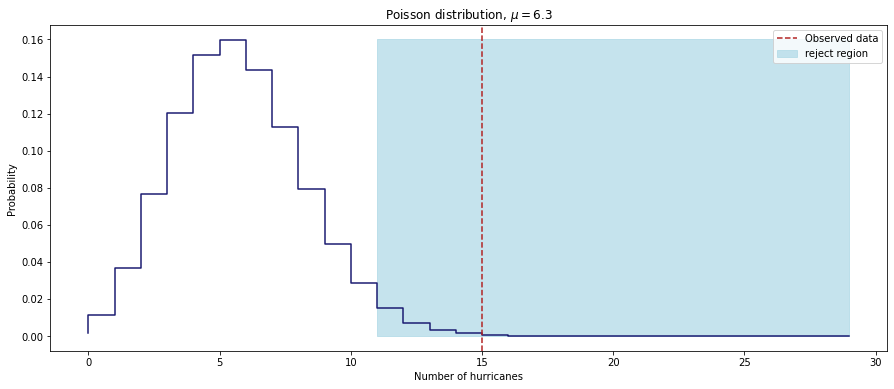

In [28]:
#Poisson right-side hypothesis testing
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

obs=15
x = np.arange(0,30,1)
y = stats.poisson.pmf(x,6.3)


#H0: 15 hurricanes are compatible with the history, H1: 15 hurricanes aren't compatible
alpha = 0.05
c = x[y.cumsum()<1-alpha][-1]+1 #Equivalent to the quantile function of 0.05

fig, _ = plt.subplots(figsize=(15, 6))
plt.step(x,y,marker='',c='midnightblue', where='pre')
plt.fill_between(x,0,0.16,where=x>=c,color='lightblue', alpha=0.7, label="reject region")
plt.axvline(obs, linestyle='--', color='firebrick', label="Observed data")
plt.legend(loc="best")
plt.title("Poisson distribution, $\mu=6.3$")
plt.xlabel("Number of hurricanes")
plt.ylabel("Probability")

pvalue = 1-stats.poisson.cdf(obs,6.3)
print("Since the pvalue is %.3e, we are in the rejected region. We reject the null hypothesis (hurricanes compatible with previous years) with %.2f significance level." %(pvalue,alpha) )


Since the pvalue is 5.279e-04, also in this case we reject the null hypothesis, with a significance level of 0.025


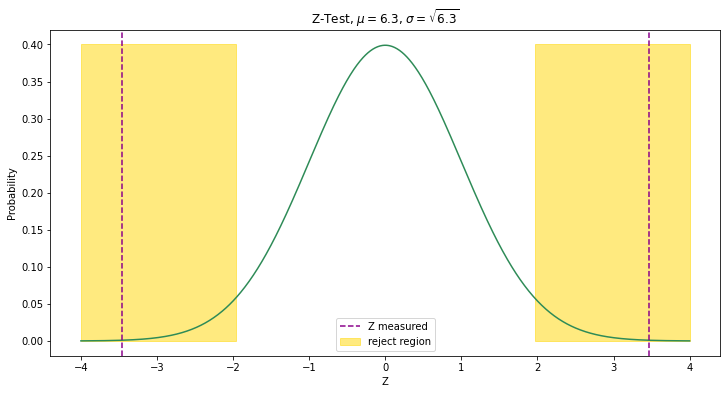

In [13]:
#Z test
sigma = np.sqrt(6.3) #Variance of Poisson distribution
mu = 6.3
Z = abs(obs - mu) / sigma

x = np.linspace(-4, 4, 1000) #x>0 <- number of hurricane in 2015
y = stats.norm.pdf(x)

fig, _ = plt.subplots(figsize=(12, 6))
plt.plot(x,y,c='seagreen')
plt.axvline(Z, linestyle='--', color='darkmagenta', label="Z measured")
plt.axvline(-Z, linestyle='--', color='darkmagenta')
plt.fill_between(x,0,0.40,where=np.abs(x)>1.96,color='gold', alpha=0.5, label="reject region") #1.96*sigma (sigma=1) is the Confidence interval for a normal distrib
plt.legend(loc="best")
plt.title("Z-Test, $\mu=6.3$, $\sigma=\sqrt{6.3}$")
plt.xlabel("Z")
plt.ylabel("Probability")

pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))

print("Since the pvalue is %.3e, also in this case we reject the null hypothesis, with a significance level of %.3f" %(pvalue,alpha/2) )

#We also notice that Poisson's original pvalue is greater than Z test's pvalue. 
#This difference is due to the gaussian approximation of the original Poisson distribution: since the Poisson tail is bigger, the first pvalue is larger than the second one.  


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

Since the pvalue 3.149e-03 is less than the significance level 0.05, we reject the null hypothesis. So the two measures are different and the exposure seems to have an effect.


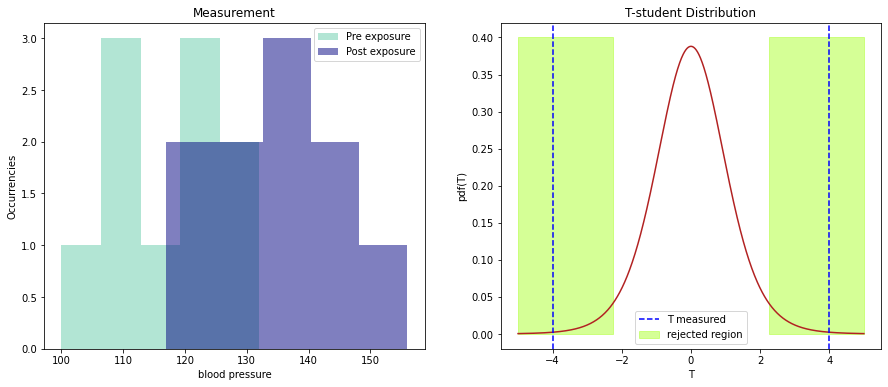

In [29]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n=pre.shape[0]

#Assuming independent, normally distribuited measures and with a similar variance
fig, ax = plt.subplots(ncols=2,figsize=(15, 6))
ax[0].hist(pre, bins=5, color='mediumaquamarine', alpha=0.5, label="Pre exposure")
ax[0].hist(post, bins=5, color='navy', alpha=0.5, label="Post exposure")
ax[0].set_ylabel("Occurrencies")
ax[0].set_xlabel("blood pressure")
ax[0].set_title("Measurement")
ax[0].legend(loc="best")

#T student
sigma = np.sqrt((pre.std()**2+post.std()**2) /2)
T = (pre.mean() - post.mean()) / (sigma * np.sqrt(2/n))

x = np.linspace(-5, +5, 1000)
y = stats.t.pdf(x, n - 1)
c1 = stats.t.ppf(0.025, n - 1) #Credibility interval
c2 = stats.t.ppf(1-0.025, n - 1) 

ax[1].plot(x, y, c="firebrick")
ax[1].fill_between(x, 0,0.40, where=np.logical_or(x<=c1, x>=c2), alpha=0.5,color='greenyellow', label='rejected region')
ax[1].axvline(T, linestyle='--', color='blue')
ax[1].axvline(-T, linestyle='--', color='blue', label="T measured")
ax[1].set_ylabel("pdf(T)")
ax[1].set_xlabel("T")
ax[1].set_title("T-student Distribution")
ax[1].legend(loc="best")

pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("Since the pvalue %.3e is less than the significance level 0.05, we reject the null hypothesis. So the two measures are different and the exposure seems to have an effect." % pvalue )


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

Pseudo-period of lynxes: 10.500 years
Pseudo-period of hares: 10.500 years
Pseudo-period of carrots: 10.500 years
By looking at the spectrum, the absolute peak is at 0 for every population
But, by looking at the trend in the first graph, it's more reasonable to get the second peak in the PSD as pseudo-period.


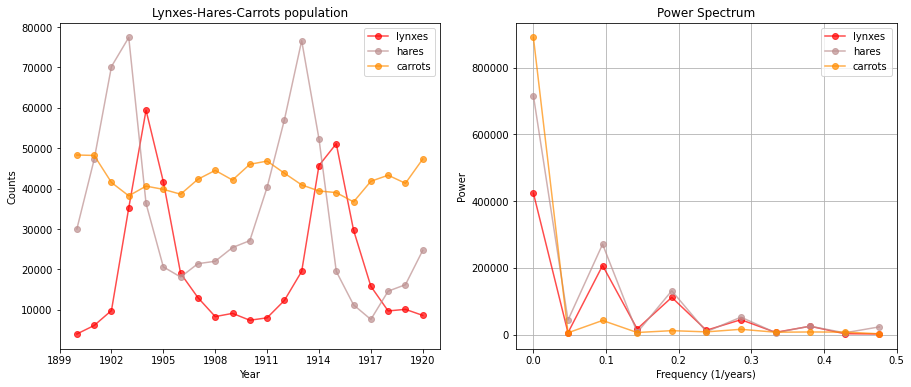

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
from scipy import fftpack

#Load and plot data over time
data = np.loadtxt("data_ex/populations.txt")
year, hares, lynxes, carrots = data.T

#Building the dictionary
d = {
  "data": [lynxes, hares, carrots],
  "names": ['lynxes', 'hares', 'carrots'],
  "c": ['red','rosybrown','darkorange'],
}

#Plot the signal and its spectrum on two axes, given the (x,y) axes and aestetichs
def signal_and_spectrum(x,y,ax,time_step,color, label):
    spectrum = pd.DataFrame(columns=['freq','psd'])
    spectrum['freq'] = fftpack.fftfreq(x.size, d=time_step)
    spectrum['psd'] = np.abs(fftpack.fft(y))
    spectrum = spectrum[spectrum['freq']>=0] #Just semi-positive frequencies, since it's symmetric
    
    ax[0].plot(x, y, marker="o", alpha=.7, c=color, label=label)
    ax[0].legend() 
    ax[1].plot(spectrum['freq'], spectrum['psd'], marker="o", alpha=.7, c=color, label=label)
    ax[1].legend() 
    ax[1].grid()
    return spectrum
    
    
#Plotting signal and PSD    
fig, ax = plt.subplots(ncols=2,figsize=(15, 6)) 
for i in range(3):
    spectrum = signal_and_spectrum(year, d["data"][i], ax, 1, d["c"][i],d["names"][i])
    second_peak = spectrum.sort_values(['psd'], ascending=False).iloc[1,0]
    print("Pseudo-period of %s: %.3f years" %(d["names"][i],1/second_peak) )

ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Year")
ax[0].set_title("Lynxes-Hares-Carrots population")
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True)) 
ax[1].set_xlabel('Frequency (1/years)')
ax[1].set_ylabel('Power')
ax[1].set_title("Power Spectrum") 

print("By looking at the spectrum, the absolute peak is at 0 for every population\nBut, by looking at the trend in the first graph, it's more reasonable to get the second peak in the PSD as pseudo-period.")


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft2, ifft2, fftfreq
from matplotlib.colors import LogNorm

np_image = plt.imread("data_ex/moonlanding.png")

def lowpass2D(FT,x_freq,y_freq,cutoff):
    FT[np.logical_or(x_freq<-cutoff,x_freq>=cutoff),:] = 0
    FT[:,np.logical_or(y_freq<-cutoff,y_freq>=cutoff)] = 0
    return FT

#Plot the picture and its power spectrum after eventual cleaning
def pic_and_spec(image, ax,title, cutoff):
      
    #FT transform
    FT_image = fft2(image)
    x_freq,y_freq = fftfreq(np_image.shape[0]),fftfreq(np_image.shape[1])
    
    #Low pass filter, cutting frequencies above cutoff
    FT_image = lowpass2D(FT_image, x_freq,y_freq,cutoff)
    
    #Getting back the image
    IFT_image = ifft2(FT_image)
    
    fig, ax = plt.subplots(ncols=2,figsize=(15, 6)) 
    
    #Plotting picture and its spectrum    
    ax[0].imshow(np.abs(IFT_image),cmap = plt.get_cmap('gray'))
    ax[0].set_ylabel("Pixel")
    ax[0].set_xlabel("Pixel")
    ax[0].set_title(title)  
    
    grid = x_freq.min(), x_freq.max(), y_freq.min(), y_freq.max(),
    psd_plot = ax[1].imshow(np.abs(FT_image),norm=LogNorm(vmin=5), extent=grid)
    ax[1].set_ylabel("1/Pixel")
    ax[1].set_xlabel("1/Pixel")
    ax[1].set_title("Power Spectrum")
    plt.colorbar(psd_plot)

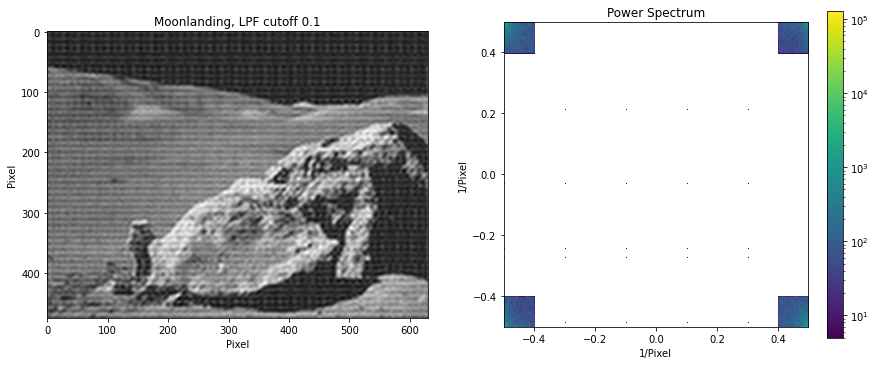

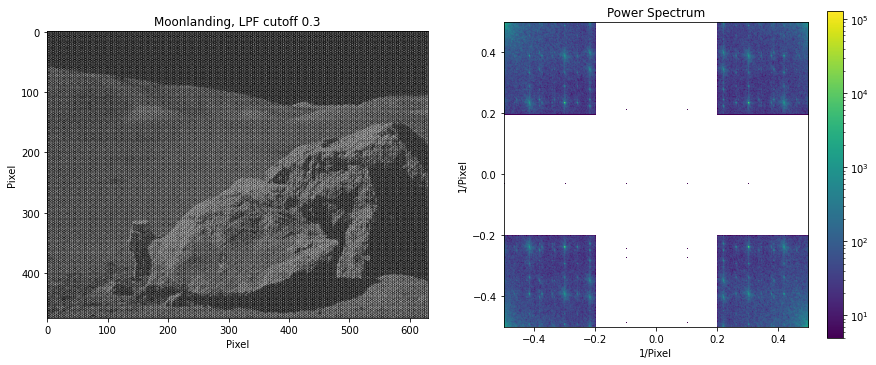

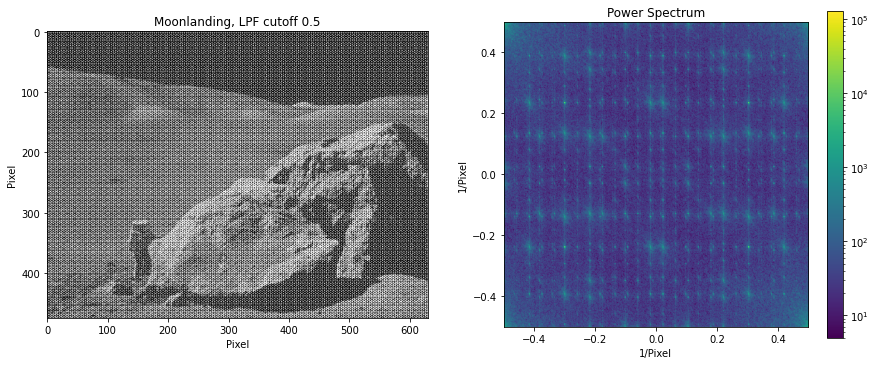

In [6]:
#Plotting for different cutoff frequencies
for c in [0.1,0.3,0.5]:
    pic_and_spec(np_image,ax, "Moonlanding, LPF cutoff "+str(c), cutoff=c)